In [4]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
from __future__ import unicode_literals
from hazm import *
df = pd.read_csv ('divar_train.csv')
df

,title,description,categories
0,بلبل خرمایی,سه عدد بلبل خرمایی سه ماهه.از وقتی جوجه بودن خ...,leisure-hobbies
1,عینک اسکی در حد,عینک اسکی دبل لنز مارک يو وكس در حد نو اصلی م...,leisure-hobbies
2,تکیه سر تویوتا پرادو,پارچه ای سالم و تمیز.,vehicles
3,مجسمه کریستال24%,مجسمه دکوری کریستال بالرین Rcr24%,for-the-home
4,کیف و ساک,هر 2 کاملا تمیز هستند,personal
...,...,...,...
10195,ان هاش 85,نیمه دوم همه چی به شرط در حد خشک 260تا کار,vehicles
10196,405 دوگانه کارخانه. تمیز,فابریک 4 حلقه لاستیک 205 نو بیمه یکسال تخفیف ب...,vehicles
10197,بخاری گازی دودکش دار پلار,بخاری نو و بسیار تمیز هستش\nبا مشتری واقعی کنا...,for-the-home
10198,نر کله برنجی چتری,سلام به دلیل کمبود جا واسباب کشی به کمترین قیم...,leisure-hobbies


In [5]:
lemmatizer = Lemmatizer()
print(lemmatizer.lemmatize('رفتن'))
print(lemmatizer.lemmatize('رو'))
print(lemmatizer.lemmatize('رفتم'))
print(lemmatizer.lemmatize('رفتیم'))
print(lemmatizer.lemmatize('رفته بود'))
print(lemmatizer.lemmatize('رفت'))
normalizer = Normalizer()
print(normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند'))
str_ = "سالمه سالمه بشرط\nقیمت نوش داخل بازار600تومنه"
# print(normalizer.normalize('سالمه سالمه بشرط\nقیمت نوش داخل بازار600تومن'))
str2 = str_.replace("\n", "")
print(normalizer.normalize(str2))


رفتن
رو
رفت#رو
رفت#رو
رفته بود
رفت#رو
اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند
سالمه سالمه بشرطقیمت نوش داخل بازار۶۰۰تومنه


In [6]:
lemmatizer = Lemmatizer()
normalizer = Normalizer()
words = []
k = 0
for i in df["title"] :
    str2 = i.replace("\n", " ")
    str3 = str2.replace("\r", " ")
    str4 = normalizer.normalize(str3)
    words = word_tokenize(str4)
    #print ("  " , words)
    #p = 0
    str1 = ""
    for j in words:
        str1 = str1 + lemmatizer.lemmatize(j) + ' '
        #print(j)
    #str2 = str1.replace("\n", "")
    
    df["title"][k] = str1
    #print(df["title"][k])
    k = k + 1
words = []
k = 0
for i in df["description"] :
    str2 = i.replace("\n", " ")
    str3 = str2.replace("\r", " ")
    str4 = normalizer.normalize(str3)
    words = word_tokenize(str4)
    #p = 0
    str1 = ""
    for j in words:
        str1 = str1 + lemmatizer.lemmatize(j) + ' '
        #print(j)
    #str2 = str1.replace("\n", "")
    df["description"][k] = str1
    #print(df["description"][k])
    k = k + 1

In [7]:
df["description"] = df["description"] + df["title"]
del df["title"]
df

,description,categories
0,سه عدد بلبل خرما سه ماهه . از وقت جوجه بودن خو...,leisure-hobbies
1,عینک اسکی دبل لنز مارک یو وکس در حد نو اصل میب...,leisure-hobbies
2,پارچه سالم و تمیز . تکیه سر تویوتا پرادو,vehicles
3,مجسمه دکوری کریستال بالرین Rcr ۲۴ ٪ مجسمه کریس...,for-the-home
4,هر ۲ کاملا تمیز #هست کیف و ساک,personal
...,...,...
10195,نیمه دوم همه چی به شرط در حد خشک ۲۶۰ تا کار ان...,vehicles
10196,فابریک ۴ حلقه لاستیک ۲۰۵ نو بیمه یکسال تخفیف ب...,vehicles
10197,بخاری نو و بسیار تمیز هستش با مشتری واقعی کنار...,for-the-home
10198,سلام به دلیل کمبود جا واسباب کشید#کش به کمترین...,leisure-hobbies


In [8]:
df["categories"].value_counts()

vehicles              1700
for-the-home          1700
businesses            1700
electronic-devices    1700
personal              1700
leisure-hobbies       1700
Name: categories, dtype: int64

In [11]:
electronic_devices = {}
for_the_home = {}
leisure_hobbies = {}
vehicles = {}
personal = {}
businesses = {}
temp = []
k = 0
for i in df["description"]:
    if df["categories"][k] == "electronic-devices" :
        temp = word_tokenize(i)
        for j in temp :
            if electronic_devices.get(j) == None:
                electronic_devices[j] = 1
            else :
                electronic_devices[j] += 1
     
    if df["categories"][k] == "for-the-home" :
        temp = word_tokenize(i)
        for j in temp :
            if for_the_home.get(j) == None:
                for_the_home[j] = 1
            else :
                for_the_home[j] += 1
                
    if df["categories"][k] == "leisure-hobbies" :
        temp = word_tokenize(i)
        for j in temp :
            if leisure_hobbies.get(j) == None:
                leisure_hobbies[j] = 1
            else :
                leisure_hobbies[j] += 1
                
    if df["categories"][k] == "vehicles" :
        temp = word_tokenize(i)
        for j in temp :
            if vehicles.get(j) == None:
                vehicles[j] = 1
            else :
                vehicles[j] += 1            
                
    if df["categories"][k] == "personal" :
        temp = word_tokenize(i)
        for j in temp :
            if personal.get(j) == None:
                personal[j] = 1
            else :
                personal[j] += 1      
                
    if df["categories"][k] == "businesses" :
        temp = word_tokenize(i)
        for j in temp :
            if businesses.get(j) == None:
                businesses[j] = 1
            else :
                businesses[j] += 1                
                             
    k = k + 1

electronic_devices["."] , electronic_devices["،"] , electronic_devices["و"] , electronic_devices["در"] , electronic_devices["با"] ,electronic_devices["فقط"] , electronic_devices["شده"] , electronic_devices["به"] , electronic_devices["هم"] = 0,0,0,0,0,0,0,0,0
for_the_home["."] , for_the_home["،"] , for_the_home["و"] , for_the_home["در"] , for_the_home["با"] ,for_the_home["فقط"] , for_the_home["شده"] , for_the_home["به"] , for_the_home["هم"] = 0,0,0,0,0,0,0,0,0    
leisure_hobbies["."] , leisure_hobbies["،"] , leisure_hobbies["و"] , leisure_hobbies["در"] , leisure_hobbies["با"] ,leisure_hobbies["فقط"] , leisure_hobbies["شده"] , leisure_hobbies["به"] , leisure_hobbies["هم"] = 0,0,0,0,0,0,0,0,0
vehicles["."] , vehicles["،"] , vehicles["و"] , vehicles["در"] , vehicles["با"] ,vehicles["فقط"] , vehicles["شده"] , vehicles["به"] , vehicles["هم"] = 0,0,0,0,0,0,0,0,0
personal["."] , personal["،"] , personal["و"] , personal["در"] , personal["با"] ,personal["فقط"] , personal["شده"] , personal["به"] , personal["هم"] = 0,0,0,0,0,0,0,0,0    
businesses["."] , businesses["،"] , businesses["و"] , businesses["در"] , businesses["با"] ,businesses["فقط"] , businesses["شده"] , businesses["به"] , businesses["هم"] = 0,0,0,0,0,0,0,0,0

a0 = dict(sorted(businesses.items(), key=lambda item: item[1]))
b0 = list(a0.items())
size_ = len(b0)
#print(b0)
print("businesses")
print(b0[size_ - 1][0])
print(b0[size_ - 2][0])
print(b0[size_ - 3][0])
print(b0[size_ - 4][0])
print(b0[size_ - 5][0])

a1 = dict(sorted(personal.items(), key=lambda item: item[1]))
b1 = list(a1.items())
size_ = len(b1)
#print(b1)
print("personal")
print(b1[size_ - 1][0])
print(b1[size_ - 2][0])
print(b1[size_ - 3][0])
print(b1[size_ - 4][0])
print(b1[size_ - 5][0])

a2 = dict(sorted(vehicles.items(), key=lambda item: item[1]))
b2 = list(a2.items())
size_ = len(b2)
#print(b2)
print("vehicles")
print(b2[size_ - 1][0])
print(b2[size_ - 2][0])
print(b2[size_ - 3][0])
print(b2[size_ - 4][0])
print(b2[size_ - 5][0])

a3 = dict(sorted(leisure_hobbies.items(), key=lambda item: item[1]))
b3 = list(a3.items())
size_ = len(b3)
#print(b3)
print("leisure_hobbies")
print(b3[size_ - 1][0])
print(b3[size_ - 2][0])
print(b3[size_ - 3][0])
print(b3[size_ - 4][0])
print(b3[size_ - 5][0])

a4 = dict(sorted(for_the_home.items(), key=lambda item: item[1]))
b4 = list(a4.items())
size_ = len(b4)
#print(b4)
print("for_the_home")
print(b4[size_ - 1][0])
print(b4[size_ - 2][0])
print(b4[size_ - 3][0])
print(b4[size_ - 4][0])
print(b4[size_ - 5][0])

electronic_devices[":"] = 0
a5 = dict(sorted(electronic_devices.items(), key=lambda item: item[1]))
b5 = list(a5.items())
size_ = len(b5)
#print(b5)
print("electronic_devices")
print(b5[size_ - 1][0])
print(b5[size_ - 2][0])
print(b5[size_ - 3][0])
print(b5[size_ - 4][0])
print(b5[size_ - 5][0])

size_ = len(b0)  
x0 = [b0[size_ - 1][0] , b0[size_ - 2][0] , b0[size_ - 3][0] , b0[size_ - 4][0] , b0[size_ - 5][0]]
y0 = [b0[size_ - 1][1] , b0[size_ - 2][1] , b0[size_ - 3][1] , b0[size_ - 4][1] , b0[size_ - 5][1]]
size_ = len(b1)  
x1 = [b1[size_ - 1][0] , b1[size_ - 2][0] , b1[size_ - 3][0] , b1[size_ - 4][0] , b1[size_ - 5][0]]
y1 = [b1[size_ - 1][1] , b1[size_ - 2][1] , b1[size_ - 3][1] , b1[size_ - 4][1] , b1[size_ - 5][1]]
size_ = len(b2) 
x2 = [b2[size_ - 1][0] , b2[size_ - 2][0] , b2[size_ - 3][0] , b2[size_ - 4][0] , b2[size_ - 5][0]]
y2 = [b2[size_ - 1][1] , b2[size_ - 2][1] , b2[size_ - 3][1] , b2[size_ - 4][1] , b2[size_ - 5][1]]
size_ = len(b3) 
x3 = [b3[size_ - 1][0] , b3[size_ - 2][0] , b3[size_ - 3][0] , b3[size_ - 4][0] , b3[size_ - 5][0]]
y3 = [b3[size_ - 1][1] , b3[size_ - 2][1] , b3[size_ - 3][1] , b3[size_ - 4][1] , b3[size_ - 5][1]]
size_ = len(b4) 
x4 = [b4[size_ - 1][0] , b4[size_ - 2][0] , b4[size_ - 3][0] , b4[size_ - 4][0] , b4[size_ - 5][0]]
y4 = [b4[size_ - 1][1] , b4[size_ - 2][1] , b4[size_ - 3][1] , b4[size_ - 4][1] , b4[size_ - 5][1]]
size_ = len(b5)
x5 = [b5[size_ - 1][0] , b5[size_ - 2][0] , b5[size_ - 3][0] , b5[size_ - 4][0] , b5[size_ - 5][0]]
y5 = [b5[size_ - 1][1] , b5[size_ - 2][1] , b5[size_ - 3][1] , b5[size_ - 4][1] , b5[size_ - 5][1]]


businesses
فروش
دستگاه
عدد
نو
قیمت
personal
نو
سایز
لباس
کفش
قیمت
vehicles
بیمه
رنگ
سالم
مدل
بدون
leisure_hobbies
سالم
جفت
یک
نر
قیمت
for_the_home
نو
سالم
میز
مبل
نفره
electronic_devices
گوش
سالم
نو
تمیز
بدون


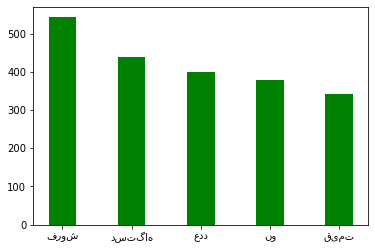

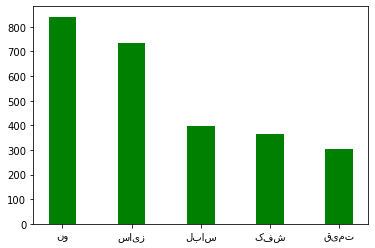

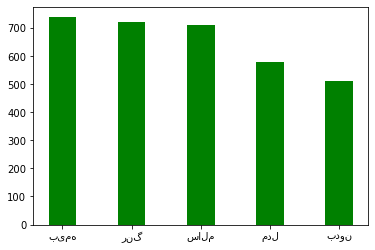

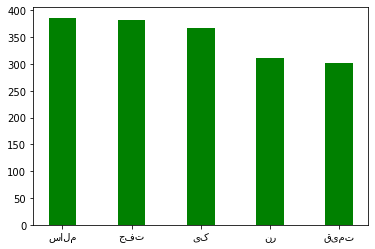

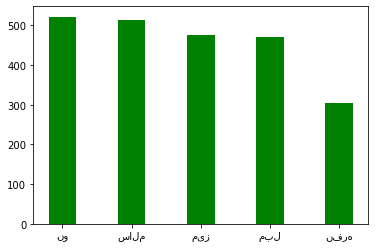

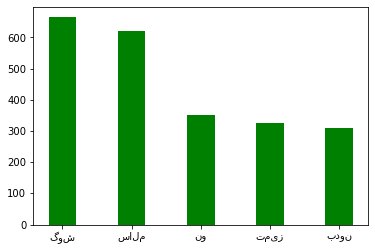

In [12]:
import matplotlib.pyplot as plt
plt.bar(x0, y0, color ='green',
        width = 0.4)
plt.show()
plt.bar(x1, y1, color ='green',
        width = 0.4)
plt.show()
plt.bar(x2, y2, color ='green',
        width = 0.4)
plt.show()
plt.bar(x3, y3, color ='green',
        width = 0.4)
plt.show()
plt.bar(x4, y4, color ='green',
        width = 0.4)
plt.show()
plt.bar(x5, y5, color ='green',
        width = 0.4)
plt.show()

In [13]:
k = 0
words = []
al = 0.4
all_class = []
busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
class_size = df["categories"].value_counts()[0]
m = 0
for i in df["description"]:
    busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
    m += 1
    words = word_tokenize(i);
    for j in words:
        if businesses.get(j) == None:
            busi = busi * (al) / (class_size + al * len(words))
        else :
            busi = busi * (businesses[j] + al) / (class_size + al * len(words))
    
        if personal.get(j) == None:
            perso = perso * (al) / (class_size + al * len(words))
        else :
            perso = perso * (personal[j] + al) / (class_size + al * len(words))
        
        if vehicles.get(j) == None:
            vehi = vehi * (al) / (class_size + al * len(words))
        else :
            vehi = vehi * (vehicles[j] + al) / (class_size + al * len(words))
        
        if leisure_hobbies.get(j) == None:
            leisure = leisure * (al) / (class_size + al * len(words))
        else :
            leisure = leisure * (leisure_hobbies[j] + al) / (class_size + al * len(words))
        
        if for_the_home.get(j) == None:
                for_the = for_the * (al) / (class_size + al * len(words))
        else :
            for_the = for_the * (for_the_home[j] + al) / (class_size + al * len(words))
        
        if electronic_devices.get(j) == None:
                elec = elec * (al) / (class_size + al * len(words))
        else :
            elec = elec * (electronic_devices[j] + al) / (class_size + al * len(words))
    
    if (max(busi , perso , vehi , leisure , for_the , elec) == busi):
        all_class.append("businesses")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == perso):
        all_class.append("personal")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == vehi):
        all_class.append("vehicles")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == leisure):
        all_class.append("leisure-hobbies")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == for_the):
        all_class.append("for-the-home")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == elec):
        all_class.append("electronic-devices")
k = 0
tr = 0
for i in df["description"]:
    if df["categories"][k] == all_class[k]:
        tr += 1
    k += 1
print(tr / class_size / 6)
#print(all_class)
        

0.9504901960784314


In [14]:
k = 0
words = []
al = 0.4
all_class = []
busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
class_size = df["categories"].value_counts()[0]
for i in df["description"]:
    busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
    words = word_tokenize(i);
    for j in words:
        if businesses.get(j) == None:
            busi = 0;
        else :
            busi = busi * (businesses[j] ) / (class_size )
    
        if personal.get(j) == None:
            perso = 0
        else :
            perso = perso * (personal[j] ) / (class_size)
        
        if vehicles.get(j) == None:
            vehi = 0
        else :
            vehi = vehi * (vehicles[j] ) / (class_size)
        
        if leisure_hobbies.get(j) == None:
            leisure = 0
        else :
            leisure = leisure * (leisure_hobbies[j] ) / (class_size)
        
        if for_the_home.get(j) == None:
                for_the = 0
        else :
            for_the = for_the * (for_the_home[j] ) / (class_size)
        
        if electronic_devices.get(j) == None:
                elec = 0
        else :
            elec = elec * (electronic_devices[j]) / (class_size)
    if (max(busi , perso , vehi , leisure , for_the , elec) == busi):
        all_class.append("businesses")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == perso):
        all_class.append("personal")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == vehi):
        all_class.append("vehicles")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == leisure):
        all_class.append("leisure-hobbies")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == for_the):
        all_class.append("for-the-home")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == elec):
        all_class.append("electronic-devices")
k = 0
tr = 0
for i in df["description"]:
    if df["categories"][k] == all_class[k]:
        tr += 1
    k += 1
print(tr / class_size / 6)
#print(len(all_class))
#print(all_class)
        

0.36000000000000004


In [15]:
df2 = pd.read_csv ('divar_test.csv')
df2

,title,description,categories
0,کیف مجلسی نو,کیف مجلسی نوی نو,personal
1,دیوار کوب نمدی تزیینی,مناسب برای جهاز عروس,for-the-home
2,دو تیکه بسیار بسیار تمیز و سالم,با کشوی مخفی و شیک,for-the-home
3,مودم,سلام مودم سالم با وسایلش،دیگه ب کارم نمیاد \nم...,electronic-devices
4,تعداد18عددبوقلمون به قیمت عمده,سلام تعدای بوقلمون دارم به علت جابه جایی به فر...,leisure-hobbies
...,...,...,...
1795,باسکول 300کیلویی,سالمه سالمه بشرط\nقیمت نوش داخل بازار600تومنه,businesses
1796,میز مدیریتی با کنفرانس,میز مدیریتی با کنفرانس \nتمیز سالم بدون خط و خش,businesses
1797,باند aiwa,سالم،با اسپیکر,electronic-devices
1798,عروس هلندی مولد,پنج تا عروس هلندی، دو جفت ویک تک،یه جفتش دم ت...,leisure-hobbies


In [16]:
lemmatizer = Lemmatizer()
normalizer = Normalizer()
words = []
k = 0
for i in df2["title"] :
    str2 = i.replace("\n", " ")
    str3 = str2.replace("\r", " ")
    str4 = normalizer.normalize(str3)
    words = word_tokenize(str4)
    #print ("  " , words)
    #p = 0
    str1 = ""
    for j in words:
        str1 = str1 + lemmatizer.lemmatize(j) + ' '
        #print(j)
    #str2 = str1.replace("\n", "")
    
    df2["title"][k] = str1
    #print(df2["title"][k])
    k = k + 1
words = []
k = 0
for i in df2["description"] :
    str2 = i.replace("\n", " ")
    str3 = str2.replace("\r", " ")
    str4 = normalizer.normalize(str3)
    words = word_tokenize(str4)
    #p = 0
    str1 = ""
    for j in words:
        str1 = str1 + lemmatizer.lemmatize(j) + ' '
        #print(j)
    #str2 = str1.replace("\n", "")
    df2["description"][k] = str1
    #print(df2["description"][k])
    k = k + 1

In [17]:
df2["description"] = df2["description"] + df2["title"]
del df2["title"]
df2

,description,categories
0,کیف مجلس نو نو کیف مجلس نو,personal
1,مناسب برای جهاز عروس دیوار کوب نمد تزیین,for-the-home
2,با کشو مخفی و شیک دو تیکه بسیار بسیار تمیز و س...,for-the-home
3,سلام مودم سالم با وسایل ، دیگه ب کاشت#کار نمیا...,electronic-devices
4,سلام تعدای بوقلمون داشت#دار به علت جابه جا به ...,leisure-hobbies
...,...,...
1795,سالمه سالمه بشرط قیمت نوش داخل بازار ۶۰۰ تومنه...,businesses
1796,میز مدیریت با کنفرانس تمیز سالم بدون خط و خش م...,businesses
1797,سالم ، با اسپیکر باند aiwa,electronic-devices
1798,پنج تا عروس هلند ، دو جفت ویک تک ، یه جفت دم ت...,leisure-hobbies


In [26]:
k = 0
words = []
al = 0.4
all_class = []
busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
class_size = df2["categories"].value_counts()[0]
m = 0
for i in df2["description"]:
    busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
    m += 1
    words = word_tokenize(i);
    for j in words:
        if businesses.get(j) == None:
            busi = busi * (al) / (class_size + al * len(words))
        else :
            busi = busi * (businesses[j] + al) / (class_size + al * len(words))
    
        if personal.get(j) == None:
            perso = perso * (al) / (class_size + al * len(words))
        else :
            perso = perso * (personal[j] + al) / (class_size + al * len(words))
        
        if vehicles.get(j) == None:
            vehi = vehi * (al) / (class_size + al * len(words))
        else :
            vehi = vehi * (vehicles[j] + al) / (class_size + al * len(words))
        
        if leisure_hobbies.get(j) == None:
            leisure = leisure * (al) / (class_size + al * len(words))
        else :
            leisure = leisure * (leisure_hobbies[j] + al) / (class_size + al * len(words))
        
        if for_the_home.get(j) == None:
                for_the = for_the * (al) / (class_size + al * len(words))
        else :
            for_the = for_the * (for_the_home[j] + al) / (class_size + al * len(words))
        
        if electronic_devices.get(j) == None:
                elec = elec * (al) / (class_size + al * len(words))
        else :
            elec = elec * (electronic_devices[j] + al) / (class_size + al * len(words))
    
    if (max(busi , perso , vehi , leisure , for_the , elec) == busi):
        all_class.append("businesses")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == perso):
        all_class.append("personal")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == vehi):
        all_class.append("vehicles")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == leisure):
        all_class.append("leisure-hobbies")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == for_the):
        all_class.append("for-the-home")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == elec):
        all_class.append("electronic-devices")
k = 0
tr = 0
b_num = 0
b_t_num = 0
p_num = 0
p_t_num = 0
v_num = 0
v_t_num = 0
l_num = 0
l_t_num = 0
f_num = 0
f_t_num = 0
e_num = 0
e_t_num = 0
for i in df2["description"]:
    if df2["categories"][k] == all_class[k]:
        tr += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "businesses":
        b_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "personal":
        p_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "vehicles":
        v_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "leisure-hobbies":
        l_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "for-the-home":
        f_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "electronic-devices":
        e_num += 1
    if df2["categories"][k] == "businesses":
        b_t_num += 1
    if df2["categories"][k] == "personal":
        p_t_num += 1
    if df2["categories"][k] == "vehicles":
        v_t_num += 1
    if df2["categories"][k] == "leisure-hobbies":
        l_t_num += 1
    if df2["categories"][k] == "for-the-home":
        f_t_num += 1
    if df2["categories"][k] == "electronic-devices":
        e_t_num += 1
    k += 1
print("accuracy is : " , tr / class_size / 6)
print("businesses recall and precision is : " , b_num / b_t_num)
print("personal recall and precision is : " , p_num / p_t_num)
print("vehicles recall and precision is : " , v_num / v_t_num)
print("leisure-hobbies recall and precision is : " , l_num / l_t_num)
print("for-the-home recall and precision is : " , f_num / f_t_num)
print("electronic-devices recall and precision is : " , e_num / e_t_num)
print("same value as recall and precision for each class since recall = precision")
#print(all_class)
        

accuracy is :  0.8583333333333334
businesses recall and precision is :  0.8366666666666667
personal recall and precision is :  0.8733333333333333
vehicles recall and precision is :  0.9033333333333333
leisure-hobbies recall and precision is :  0.84
for-the-home recall and precision is :  0.7566666666666667
electronic-devices recall and precision is :  0.94
same value as recall and precision for each class since recall = precision


In [27]:
k = 0
words = []
al = 0.4
all_class = []
busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
class_size = df2["categories"].value_counts()[0]
for i in df2["description"]:
    busi , perso , vehi , leisure , for_the , elec = 1 , 1 , 1 , 1 , 1 , 1
    words = word_tokenize(i);
    for j in words:
        if businesses.get(j) == None:
            busi = 0;
        else :
            busi = busi * (businesses[j] ) / (class_size )
    
        if personal.get(j) == None:
            perso = 0
        else :
            perso = perso * (personal[j] ) / (class_size)
        
        if vehicles.get(j) == None:
            vehi = 0
        else :
            vehi = vehi * (vehicles[j] ) / (class_size)
        
        if leisure_hobbies.get(j) == None:
            leisure = 0
        else :
            leisure = leisure * (leisure_hobbies[j] ) / (class_size)
        
        if for_the_home.get(j) == None:
                for_the = 0
        else :
            for_the = for_the * (for_the_home[j] ) / (class_size)
        
        if electronic_devices.get(j) == None:
                elec = 0
        else :
            elec = elec * (electronic_devices[j]) / (class_size)
    if (max(busi , perso , vehi , leisure , for_the , elec) == busi):
        all_class.append("businesses")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == perso):
        all_class.append("personal")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == vehi):
        all_class.append("vehicles")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == leisure):
        all_class.append("leisure-hobbies")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == for_the):
        all_class.append("for-the-home")
    elif (max(busi , perso , vehi , leisure , for_the , elec) == elec):
        all_class.append("electronic-devices")
k = 0
tr = 0
b_num = 0
b_t_num = 0
p_num = 0
p_t_num = 0
v_num = 0
v_t_num = 0
l_num = 0
l_t_num = 0
f_num = 0
f_t_num = 0
e_num = 0
e_t_num = 0
for i in df2["description"]:
    if df2["categories"][k] == all_class[k]:
        tr += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "businesses":
        b_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "personal":
        p_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "vehicles":
        v_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "leisure-hobbies":
        l_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "for-the-home":
        f_num += 1
    if df2["categories"][k] == all_class[k] and df2["categories"][k] == "electronic-devices":
        e_num += 1
    if df2["categories"][k] == "businesses":
        b_t_num += 1
    if df2["categories"][k] == "personal":
        p_t_num += 1
    if df2["categories"][k] == "vehicles":
        v_t_num += 1
    if df2["categories"][k] == "leisure-hobbies":
        l_t_num += 1
    if df2["categories"][k] == "for-the-home":
        f_t_num += 1
    if df2["categories"][k] == "electronic-devices":
        e_t_num += 1
    k += 1
print("accuracy is : " , tr / class_size / 6)
print("businesses recall and precision is : " , b_num / b_t_num)
print("personal recall and precision is : " , p_num / p_t_num)
print("vehicles recall and precision is : " , v_num / v_t_num)
print("leisure-hobbies recall and precision is : " , l_num / l_t_num)
print("for-the-home recall and precision is : " , f_num / f_t_num)
print("electronic-devices recall and precision is : " , e_num / e_t_num)
print("same value as recall and precision for each class since recall = precision")
#print(all_class)
        

accuracy is :  0.23222222222222222
businesses recall and precision is :  0.99
personal recall and precision is :  0.10333333333333333
vehicles recall and precision is :  0.1
leisure-hobbies recall and precision is :  0.06333333333333334
for-the-home recall and precision is :  0.10333333333333333
electronic-devices recall and precision is :  0.03333333333333333
same value as recall and precision for each class since recall = precision


<br>Naive Bayes Classifier<br>
Mohammad Araghi     810198436<br>
<br>
<br>
<br>
In this assignment we will use Naive Bayes Classifier to analyse and predict Divar site's datas and <br>
categorise them by training our model and then use it for test input .<br>
<br>
Pre Proccessing<br>
We can try many diffrent ways to pre proccess our input data and make it easier and better<br>
to read , classify and work with, and each way might lead to diffrent outputs and accuracies. <br>
After normalizing and removing /n and /r from our data , we have to choices to use stem or lemmatize
to make close words with almost same meanings as one word .<br>
In Stemming mode , we have some common use prefix and postfixes which stem will remove them 
and try to make the word as simple as possible , while that might not be the best way to do so <br>
in our project .<br>
In lemmatizing , lemmatizer will search in dictionary and find noun and verb of our word ,<br>
and concat them with a # between. This will fit our project more and lead to better results .<br>
And for normalising , it will make the scentense into a standard and do things like fixing whitespaces and etc.<br>
For this project I used hazm library since parsivar liberary did not have lemmatizing ability.<br>



Phase 2<br>
<br>
Posterior : Probability of class = c  knowing that word x is in description <br>
Likelihood : Probability of a word in a class description of type = c <br>
Prior : Same for all since all categories have occured in same amount <br>
Evidence : Probablity of seeing a word <br>
<br>
We will also concat title and description columns in order to get an easier access and<br>
delete title column . <br>
<br>
Bigrams <br>
I left my phone on the left side of the room . (Left has two different meanings in this scentence)<br>
so we will say left is a Homonyms word .<br>
Bigram is enough in this scentense cause left side will show us left is a side <br>
and left my will show leaving something and shows the other meaning of left .<br>
<br>
Additive smoothing<br>
<br>
Naïve Bayes is a probabilistic classifier based on Bayes theorem and is used for classification tasks.<br>
It works well enough in text classification problems such as spam filtering and the classification of reviews as <br>
positive or negative. 
The algorithm seems perfect at first, but the fundamental representation of Naïve Bayes can create some problems in real-world scenarios.<br>
If the word is absent in the training dataset, then we don’t have its likelihood. What should we do?<br>
Approach1- Ignore the term P(w’|positive)<br>
Ignoring means that we are assigning it a value of 1, which means the probability of w’ occurring in positive <br>
P(w’|positive) and negative review P(w’|negative) is 1. This approach seems logically incorrect.<br>
Approach 2- In a bag of words model, we count the occurrence of words. The occurrences of word w’ in training are 0 <br>
. According to that P(w’|positive)=0 and P(w’|negative)=0, but this will make both 
P(positive|review) and P(negative|review) equal to 0 since we multiply all the likelihoods. <br>
This is the problem of zero probability. So, how to deal with this problem?<br>
alpha represents the smoothing parameter,<br>
K represents the number of dimensions (features) in the data, and<br>
N represents the number of reviews with y=positive<br>
If we choose a value of alpha!=0 (not equal to 0), the probability will no longer 
be zero even if a word is not present in the training dataset. <br>
So this way we will stop our zero probablities to ruin all the scentes by making the probablity of<br>
this scentence happening , which will help us to get a more realistic conclusion and improve our algorithm.<br>
<br>
So instead of x/c , we use (x + a) / (c + ka) <br>
<br>
We also deleted some words like و and . and با and از  and ... ,<br>
cause they were reapeated a lot in most of our classes and did not give us any usefull information .<br>
<br>
Assessment<br>
<br>
we can see our results above , which has 85.8 % accuraccy , amd for least recall and<br>
presicion value we have 75.6 % in additive smoothing mode. <br>
And for normal mode , our accuracy is 23 % and for business is 99% . That's because <br>
we assign all zero values to business category , which is not realistic .<br>
Our recall and precision values are same since there is no value that we don't classify , <br>
and it lead to f1 = recall = precision which shows us some problems of our algorithm , specially <br>
in normall form .<br>
Using precision or recall alone , will lead to some problems , for example <br>
as we can see in our normal mode outputs , since we guessed all of zero value scentences to<br>
be business , we have almost 100% precision , but That's not a good way and we can<br>
get it by looking at recall .<br>
F1 is the harmonic mean of precision and recall and will sometimes give us better conclusions than<br>
accuracy , specially in ueven classes .<br>
<br>
Micro formula : Just as said in assignment<br>
Macro formula : Sum of F1's / n . which n is amount of F1's <br>
Weighted formula : sum of Wi * F1i 's / sum of (Wi's) <br>
We will have same amount for weighted and macro since we have no weight and <br>
all of our classes have appeared same times .<br>

Additive :

| | Businesses | Electronic Devices | For the home | Leisure Hobbies | Personal | Vehicles | All Classes |
|----| --- | --- | --- | --- | --- | --- | --- |  
|Precision | 0.83 | 0.94 | 0.75 | 0.84 | 0.87 | 0.9 | - |
|Recall | 0.83 | 0.94 | 0.75 | 0.84 | 0.87 | 0.9 | - |
|F1-score | 0.83 | 0.94 | 0.75 | 0.84 | 0.87 | 0.9 | - |
|Accuracy | - | - | - | - | - | - | 0.858 |
|Macro Avg | - | - | - | - | - | - | 0.855 |
|Micro Avg | - | - | - | - | - | - | 0.855 |
|Weighted Avg | - | - | - | - | - | - | 0.855|

Normal : 

| | Businesses | Electronic Devices | For the home | Leisure Hobbies | Personal | Vehicles | All Classes |
|----| --- | --- | --- | --- | --- | --- | --- |  
|Precision | 0.99 | 0.03 | 0.1 | 0.06 | 0.1 | 0.1 | - |
|Recall | 0.99 | 0.03 | 0.1 | 0.06 | 0.1 | 0.1 | - |
|F1-score | 0.99 | 0.03 | 0.1 | 0.06 | 0.1 | 0.1 | - |
|Accuracy | - | - | - | - | - | - | 0.23 |
|Macro Avg | - | - | - | - | - | - | 0.23 |
|Micro Avg | - | - | - | - | - | - | 0.23 |
|Weighted Avg | - | - | - | - | - | - | 0.23|

We can see that there is a huge difference between additive and normal mode , since <br>
our normal way will give priority to some categories when we have zero value .<br>
The results for additive mode are satisfying and we can see that expect for for-the-home<br>
class , we have really good accuracies but having same amount for recall and precision and F1<br>
will not give us much info , and as we can see our means are really close too . <br>
In normal mode we have bad accuracy and other values expect for business which is not great even for business<br>
category too since a lot of wrong decriptions are assigned to it . <br>
And for accuracy and means we have almost same amount like additive .<br>
<br>
Most problems are based on our data input and our lemmatizing and the words we have deleted , which can be <br>
improved by experience and maybe using other methods than only normalizing and lemmatizing .<br>
And also canceling the priority for non Additive will help us get better accuracy and not only for<br>
business .<br>

In [31]:
import os

os.system('jupyter nbconvert --to html 1.ipynb --output out1')

0